# Week 1 - solutions

## Exercise 2 - Probabilities

One of the simplest ways to generate random variables in the real world is by rolling a die. In this case, we call the random value of the die $X$ which takes values in the sample space $S = \{1,2,3,4,5,6\}$, corresponding to the six possible sides of a normal die.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from torch.nn.parallel import replicate
np.random.seed(1) # We use a seed to ensure the same results for repeated trials

### Exercise 2.1 - Die Rolling
Use the numpy function `np.random.randint` to define a function with the name "dieroll" that simulates a single roll of a six-sided die.

In [7]:
# Exercise 2.1
# define a function that simulates a single roll of a six-sided die

def dieroll():
    random_roll = np.random.randint(1,7)
    return random_roll

 Roll the die multiple times by calling `dieroll()`. Check that it only outputs values in the event space.



In [9]:
dieroll()

4

### Exercise 2.2 - Die Rolling Simulation
The probability of the die landing on any side is supposedly: $$1/6 \approx 0.167 $$ - all sides are equally probable.
 Simulate $6000$ die rolls.  For the $6000$ rolls, plot the proportion of rolls that yield 6's,
 first using one roll, then two, then three, and so on, until $6000$. You can base your solution on the following code
 snippet for plotting by defining `samples_equal_to_n`, `N`, and `true_prob` appropriately. I.e. plot the proportion of 6 rolls as a function of number of rolls.


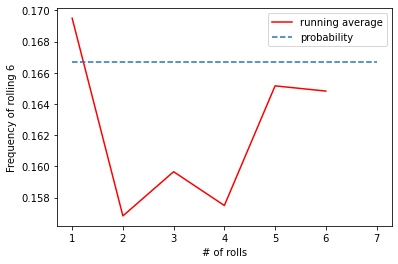

In [13]:
#Simulate 6000 die rolls and record outcome
N = 6000
samples_equal_to_n = np.zeros(6)
for n in range(1,7):
    for i in np.arange(N):
        sample = dieroll()
        if sample == n:
            samples_equal_to_n[n-1] += 1

true_prob = 1/6
running_sample_N = np.arange(1,N+1)
running_count = np.cumsum(samples_equal_to_n )
plt.plot(list(range(1,7)) , samples_equal_to_n/N ,
    'r-', label='running average')
plt.plot([1,7], [true_prob , true_prob],
    '--', label='probability')
plt.xlabel("# of rolls")
plt.ylabel("Frequency of rolling 6")
plt.legend()
plt.show()

### Exercise 2.3 - Pair of Die Rolling
Now consider rolling 2 dice. Build a new function using `dieroll` that rolls two dice and returns the pair.
Calculate the probability of rolling two sixes and check that it matches with the sampler.

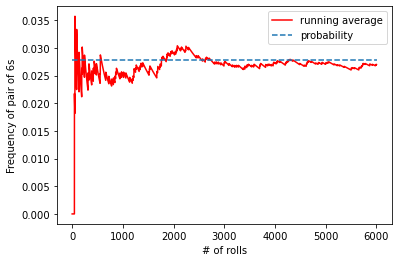

In [17]:
#define a function that simulates rolls of two dice
def twodierolls():
    return [dieroll(), dieroll()]

#simulate 6000 die rolls and record outcome
N = 6000
samples_two6s = np.zeros(N, dtype=bool)
for i in np.arange(N):
    sample = twodierolls()
    if sample == [6,6]:
        samples_two6s[i] = True

true_prob = 1/(6*6)
running_sample_N = np.arange(1,N+1)
running_count = np.cumsum(samples_two6s )
plt.plot(running_sample_N , running_count/running_sample_N ,
    'r-', label='running average')
plt.plot([1,N+1], [true_prob , true_prob],
    '--', label='probability')
plt.xlabel("# of rolls")
plt.ylabel("Frequency of pair of 6s")
plt.legend()
plt.show()

### Exercise 2.4 - Yatzy!
Finally, consider rolling 5 dice, as in the Yatzy example before.
Use the formula above to calculate the probability of rolling 5 6's (a Yatzy, in the game).
 Extend your sampling function from before to 5 dice.
 Use your sampler to check your calculation. What went wrong?
 - **There never occured 5 consecurtive 6's**


 To make sure that you all get the same result, put

np.random.seed(1)

before drawing $6000$ samples.


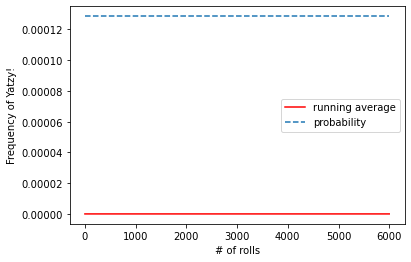

In [22]:
#function for rolling 5 dice
def fivedierolls():
    return [dieroll(), dieroll(), dieroll(), dieroll(), dieroll()]
np.random.seed(1)

#simulate 6000 die rolls and record outcome
N = 6000
samples_five6s = np.zeros(N, dtype=bool)
for i in np.arange(N):
    sample = fivedierolls()
    if sample == [6,6,6,6,6]:
        samples_five6s[i] = True
        
true_prob = 1/(6**5)
running_sample_N = np.arange(1,N+1)
running_count = np.cumsum(samples_five6s)
plt.plot(running_sample_N , running_count/running_sample_N ,
    'r-', label='running average')
plt.plot([1,N+1], [true_prob , true_prob],
    '--', label='probability')
plt.xlabel("# of rolls")
plt.ylabel("Frequency of Yatzy!")
plt.legend()    
plt.show()        

### Exercise 2.5 - Sum of Rolls
Using the facts in question 2. create function  to roll two fair, six-sided dice and return their sum.

In [24]:
#define a function that simulates rolls of two dice and return the sum of the faces
def sumtwodierolls():
    return (dieroll() + dieroll())
sumtwodierolls()

8

Simulate $6000$ rolls of pair of dice.

In [25]:
N = 6000
samples_sumtwodice = np.zeros(N)
for i in np.arange(N):
    samples_sumtwodice[i] = sumtwodierolls()

samples_sumtwodice

array([12.,  8.,  8., ...,  8.,  3., 11.])

The following function computes the frequency of each output in our space states in our sample (list of rolls).

In [30]:
def CountFrequency(my_list):
    # Creating an empty dictionary
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

freq = CountFrequency(samples_sumtwodice)

Use the previouse function to plot the frequencies for each output in our sample space.


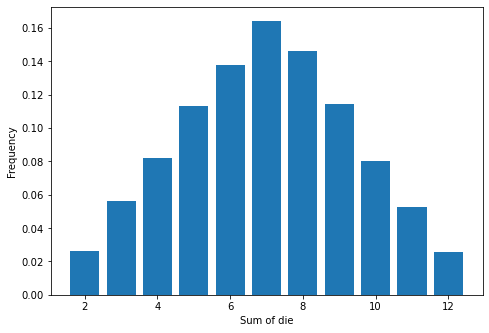

In [31]:
freqratio=[i/N for i in freq.values()]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(freq.keys(),freqratio)
ax.set_xlabel("Sum of die")
ax.set_ylabel("Frequency")
plt.show()